# CAR PRICE PREDICTION

### Problem Statement:
    With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
    cars are in demand hence making them costly and some are not in demand hence cheaper. One 
    of our clients works with small traders, who sell used cars. With the change in market due to covid 
    19 impact, our client is facing problems with their previous car price valuation machine learning 
    models. So, they are looking for new machine learning models from new data. We have to make 
    car price valuation model.This project contains two phase.
    
    1.Data Collection Phase:
    
    You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. 
    more the data better the model
    In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 
    etc.) You need web scraping for this. You have to fetch data for different locations. The number of
    columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are 
    Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and 
    at last target variable Price of the car. This data is to give you a hint about important variables in 
    used car model. You can make changes to it, you can add or you can remove some columns, it 
    completely depends on the website from which you are fetching the data.
    Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, 
    Hatchback.
    
    Note – The data which you are collecting is important to us. Kindly don’t share it on any public platforms.
    
    2.Model Building Phase:
    
    After collecting the data, you need to build a machine learning model. Before model building do all 
    data pre-processing steps. Try different models with different hyper parameters and select the best 
    model.
    Follow the complete life cycle of data science. Include all the steps like.
        1. Data Cleaning
        2. Exploratory Data Analysis
        3. Data Pre-processing
        4. Model Building
        5. Model Evaluation
        6. Selecting the best model.

## Importing the Dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows',None)

In [3]:
# loading the Dataset
df = pd.read_csv("used_car.csv")
df.head()

Model       Brand           Variant  Manufacturing_year  Driven_km Fuel_type Transmission  Selling_Price   location
0  ['Eeco']  ['Maruti']  5 Seater AC BSIV                2016      45347    Petrol       Manual           3.81  Ahmedabad
1  ['Eeco']  ['Maruti']       5 Seater AC                2020      19627    Petrol       Manual           4.70  Ahmedabad
2  ['Eeco']  ['Maruti']       5 Seater AC                2012      57341    Petrol       Manual           2.79  Ahmedabad
3  ['Eeco']  ['Maruti']       5 Seater AC                2020      17116    Petrol       Manual           4.72  Ahmedabad
4  ['Eeco']  ['Maruti']  5 Seater AC BSIV                2019      14161    Petrol       Manual           4.57  Ahmedabad

In [4]:
df.columns    # checking the variables in column section.

Index(['Model', 'Brand', 'Variant', 'Manufacturing_year', 'Driven_km', 'Fuel_type', 'Transmission', 'Selling_Price', 'location'], dtype='object')

### Dataframe Description:
    1. Model : A car's make is the brand of the vehicle, while the model refers to the name of a car product and sometimes                    a range of products.
    2. Brand : A type of product manufactured by a particular company under a particular name.
    3. Variant : Manufacturer, at his option may designate a version as a variant.
    4. Manufacturing year :  The Production market classifies years to specific vehicles, and model codes in place of the                                     model year.
    5. Diven Km  : The car is driven for particular distance.
    6. Fuel Type : Types of fuel is used for particular car.
    7. Transmission : the mechanism by which power is transmitted from an engine to the axle in a motor vehicle.
    8. Selling price : The car is quoted for particular price to sell it.
    9. Location : A particular place or position where car is sold.

#### In the above dataset the target is to predict the selling price.

In [5]:
df.info()  #Checking the information of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18865 entries, 0 to 18864
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Model               18865 non-null  object 
 1   Brand               18865 non-null  object 
 2   Variant             18865 non-null  object 
 3   Manufacturing_year  18865 non-null  int64  
 4   Driven_km           18865 non-null  int64  
 5   Fuel_type           18865 non-null  object 
 6   Transmission        18865 non-null  object 
 7   Selling_Price       18865 non-null  float64
 8   location            18865 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.3+ MB


In [6]:
df.shape #checking the data dimension

(18865, 9)

We have 18865 rows and 9 columns including the target column.

## Exploratory Data Analysis

## Preprocessing

### Unique Function for dataset:

In [7]:
df.head()

Model       Brand           Variant  Manufacturing_year  Driven_km Fuel_type Transmission  Selling_Price   location
0  ['Eeco']  ['Maruti']  5 Seater AC BSIV                2016      45347    Petrol       Manual           3.81  Ahmedabad
1  ['Eeco']  ['Maruti']       5 Seater AC                2020      19627    Petrol       Manual           4.70  Ahmedabad
2  ['Eeco']  ['Maruti']       5 Seater AC                2012      57341    Petrol       Manual           2.79  Ahmedabad
3  ['Eeco']  ['Maruti']       5 Seater AC                2020      17116    Petrol       Manual           4.72  Ahmedabad
4  ['Eeco']  ['Maruti']  5 Seater AC BSIV                2019      14161    Petrol       Manual           4.57  Ahmedabad

In [8]:
# Brand feature is replacing using replace function
df["Brand"].replace(["['Maruti']", "['Ford']", "['Mahindra']", "['Audi']", "['Toyota']",
       "['Volkswagen']", "['Honda']", "['Nissan']", "['Hyundai']",
       "['Mercedes-Benz']", "['Kia']", "['Datsun']", "['Tata']",
       "['Renault']", "['Skoda']", "['BMW']", "['Jaguar']",
       "['Chevrolet']", "['MG']", "['Volvo']", "['Jeep']", "['Land']",
       "['Force']", "['Mini']", "['Fiat']", "['Mitsubishi']",
       "['Porsche']", "['Lexus']", "['Ambassador']", "['Isuzu']",
       "['Aston']", "['Bentley']", "['Premier']", "['OpelCorsa']",
       "['Maserati']"],

                    ['Maruti', 'Ford', 'Mahindra', 'Audi', 'Toyota',
       'Volkswagen', 'Honda', 'Nissan', 'Hyundai',
       'Mercedes-Benz', 'Kia', 'Datsun', 'Tata',
       'Renault', 'Skoda', 'BMW', 'Jaguar',
       'Chevrolet', 'MG', 'Volvo', 'Jeep', 'Land',
       'Force', 'Mini', 'Fiat', 'Mitsubishi',
       'Porsche', 'Lexus', 'Ambassador', 'Isuzu',
       'Aston', 'Bentley', 'Premier', 'OpelCorsa',
       'Maserati'],inplace=True)

In [9]:
# Now, lets see we replaced Brand into unique function for further process.
df["Brand"].unique()

array(['Maruti', 'Ford', 'Mahindra', 'Audi', 'Toyota', 'Volkswagen',
       'Honda', 'Nissan', 'Hyundai', 'Mercedes-Benz', 'Kia', 'Datsun',
       'Tata', 'Renault', 'Skoda', 'BMW', 'Jaguar', 'Chevrolet', 'MG',
       'Volvo', 'Jeep', 'Land', 'Force', 'Mini', 'Fiat', 'Mitsubishi',
       'Porsche', 'Lexus', 'Ambassador', 'Isuzu', 'Aston', 'Bentley',
       'Premier', 'OpelCorsa', 'Maserati'], dtype=object)

In [10]:
df.head()

Model   Brand           Variant  Manufacturing_year  Driven_km Fuel_type Transmission  Selling_Price   location
0  ['Eeco']  Maruti  5 Seater AC BSIV                2016      45347    Petrol       Manual           3.81  Ahmedabad
1  ['Eeco']  Maruti       5 Seater AC                2020      19627    Petrol       Manual           4.70  Ahmedabad
2  ['Eeco']  Maruti       5 Seater AC                2012      57341    Petrol       Manual           2.79  Ahmedabad
3  ['Eeco']  Maruti       5 Seater AC                2020      17116    Petrol       Manual           4.72  Ahmedabad
4  ['Eeco']  Maruti  5 Seater AC BSIV                2019      14161    Petrol       Manual           4.57  Ahmedabad

In [11]:
#Check the null values in dataset
df.isnull().sum()

Model                 0
Brand                 0
Variant               0
Manufacturing_year    0
Driven_km             0
Fuel_type             0
Transmission          0
Selling_Price         0
location              0
dtype: int64

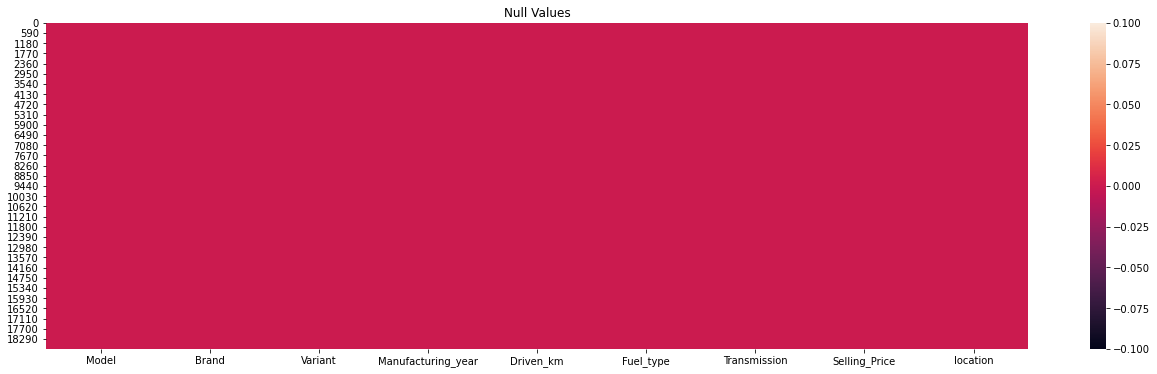

In [12]:
# Heatmap for Null value for data.
plt.figure(figsize=[22,6])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

There are no null value in the dataset.

Since, we can see lot of string values in the dataset,.then, proceed with encoding techniques to convert the string data to numerical one.

In [13]:
df.dtypes

Model                  object
Brand                  object
Variant                object
Manufacturing_year      int64
Driven_km               int64
Fuel_type              object
Transmission           object
Selling_Price         float64
location               object
dtype: object

In [14]:
df.head()

Model   Brand           Variant  Manufacturing_year  Driven_km Fuel_type Transmission  Selling_Price   location
0  ['Eeco']  Maruti  5 Seater AC BSIV                2016      45347    Petrol       Manual           3.81  Ahmedabad
1  ['Eeco']  Maruti       5 Seater AC                2020      19627    Petrol       Manual           4.70  Ahmedabad
2  ['Eeco']  Maruti       5 Seater AC                2012      57341    Petrol       Manual           2.79  Ahmedabad
3  ['Eeco']  Maruti       5 Seater AC                2020      17116    Petrol       Manual           4.72  Ahmedabad
4  ['Eeco']  Maruti  5 Seater AC BSIV                2019      14161    Petrol       Manual           4.57  Ahmedabad

#### Now we are going to add features in dataset to which is required to check the car price according to current year (2021) i.e., Current year.

In [15]:
df["Current Year"] = 2021
df.head()

Model   Brand           Variant  Manufacturing_year  Driven_km Fuel_type Transmission  Selling_Price   location  Current Year
0  ['Eeco']  Maruti  5 Seater AC BSIV                2016      45347    Petrol       Manual           3.81  Ahmedabad          2021
1  ['Eeco']  Maruti       5 Seater AC                2020      19627    Petrol       Manual           4.70  Ahmedabad          2021
2  ['Eeco']  Maruti       5 Seater AC                2012      57341    Petrol       Manual           2.79  Ahmedabad          2021
3  ['Eeco']  Maruti       5 Seater AC                2020      17116    Petrol       Manual           4.72  Ahmedabad          2021
4  ['Eeco']  Maruti  5 Seater AC BSIV                2019      14161    Petrol       Manual           4.57  Ahmedabad          2021

#### Then we move to see no of years. The car has been used by seller by adding a feature i.e., no_of_year.

#### The process carried to create a no of year is by subtracting current year and manufacturing year.

In [16]:
df["no_of_year"] = df["Current Year"] - df["Manufacturing_year"]
df.head()

Model   Brand           Variant  Manufacturing_year  Driven_km Fuel_type Transmission  Selling_Price   location  Current Year  no_of_year
0  ['Eeco']  Maruti  5 Seater AC BSIV                2016      45347    Petrol       Manual           3.81  Ahmedabad          2021           5
1  ['Eeco']  Maruti       5 Seater AC                2020      19627    Petrol       Manual           4.70  Ahmedabad          2021           1
2  ['Eeco']  Maruti       5 Seater AC                2012      57341    Petrol       Manual           2.79  Ahmedabad          2021           9
3  ['Eeco']  Maruti       5 Seater AC                2020      17116    Petrol       Manual           4.72  Ahmedabad          2021           1
4  ['Eeco']  Maruti  5 Seater AC BSIV                2019      14161    Petrol       Manual           4.57  Ahmedabad          2021           2

#### Now, Let’s see the no of years is created. so, we dropped both manufacturing year and current year from data frame.

In [17]:
df.drop(["Manufacturing_year","Current Year"],axis = 1, inplace = True)
df.head()

Model   Brand           Variant  Driven_km Fuel_type Transmission  Selling_Price   location  no_of_year
0  ['Eeco']  Maruti  5 Seater AC BSIV      45347    Petrol       Manual           3.81  Ahmedabad           5
1  ['Eeco']  Maruti       5 Seater AC      19627    Petrol       Manual           4.70  Ahmedabad           1
2  ['Eeco']  Maruti       5 Seater AC      57341    Petrol       Manual           2.79  Ahmedabad           9
3  ['Eeco']  Maruti       5 Seater AC      17116    Petrol       Manual           4.72  Ahmedabad           1
4  ['Eeco']  Maruti  5 Seater AC BSIV      14161    Petrol       Manual           4.57  Ahmedabad           2

## Encoding of DataFrame:

### 1.	One hot encoding technique with multiple variables.

In [18]:
# importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [19]:
# checking features
cat = df.select_dtypes(include='O').keys()
# display variabels
cat

Index(['Model', 'Brand', 'Variant', 'Fuel_type', 'Transmission', 'location'], dtype='object')

In [20]:
# creating new df
new_df = df[['Brand','Driven_km','Fuel_type','Transmission', 'Selling_Price','location',"no_of_year"]]
new_df.head()

Brand  Driven_km Fuel_type Transmission  Selling_Price   location  no_of_year
0  Maruti      45347    Petrol       Manual           3.81  Ahmedabad           5
1  Maruti      19627    Petrol       Manual           4.70  Ahmedabad           1
2  Maruti      57341    Petrol       Manual           2.79  Ahmedabad           9
3  Maruti      17116    Petrol       Manual           4.72  Ahmedabad           1
4  Maruti      14161    Petrol       Manual           4.57  Ahmedabad           2

In [21]:
# unique values in each columns
for x in new_df.columns:
    #printing unique values
    print(x ,':', len(new_df[x].unique()))

Brand : 35
Driven_km : 4399
Fuel_type : 5
Transmission : 2
Selling_Price : 1263
location : 12
no_of_year : 25


In [22]:
# finding the top 20 categories
new_df.Brand.value_counts().sort_values(ascending=False).head(20)

Maruti           5299
Hyundai          3654
Honda            1751
Toyota           1168
Mahindra          892
Ford              849
Volkswagen        698
Mercedes-Benz     695
BMW               627
Renault           592
Audi              550
Tata              435
Skoda             364
Chevrolet         239
Nissan            220
Land              132
Kia               106
Jaguar             85
Jeep               83
Volvo              80
Name: Brand, dtype: int64

In [23]:
# make list with top 10 variables
top_10 = [x for x in new_df.Brand.value_counts().sort_values(ascending=False).head(10).index]
top_10

['Maruti',
 'Hyundai',
 'Honda',
 'Toyota',
 'Mahindra',
 'Ford',
 'Volkswagen',
 'Mercedes-Benz',
 'BMW',
 'Renault']

In [24]:
# for all categorical variables we selected
def top_x(df2,variable,top_x_labels):
    for label in top_x_labels:
        df2[variable+'_'+label] = np.where(df[variable]==label,1,0)
# read the data again
df = df[['Brand','Driven_km','Fuel_type','Transmission', 'Selling_Price','location','no_of_year']]
#encode brand into the 10 most frequent categories
top_x(df,'Brand',top_10)
# display data
df.head()

Brand  Driven_km Fuel_type Transmission  Selling_Price   location  no_of_year  Brand_Maruti  Brand_Hyundai  Brand_Honda  Brand_Toyota  Brand_Mahindra  Brand_Ford  Brand_Volkswagen  Brand_Mercedes-Benz  Brand_BMW  Brand_Renault
0  Maruti      45347    Petrol       Manual           3.81  Ahmedabad           5             1              0            0             0               0           0                 0                    0          0              0
1  Maruti      19627    Petrol       Manual           4.70  Ahmedabad           1             1              0            0             0               0           0                 0                    0          0              0
2  Maruti      57341    Petrol       Manual           2.79  Ahmedabad           9             1              0            0             0               0           0                 0                    0          0              0
3  Maruti      17116    Petrol       Manual           4.72  Ahmedabad           1             1              0            0             0               0           0                 0                    0          0              0
4  Maruti      14161    Petrol       Manual           4.57  Ahmedabad           2             1              0            0             0               0           0                 0                    0          0              0

In [25]:
df.columns

Index(['Brand', 'Driven_km', 'Fuel_type', 'Transmission', 'Selling_Price', 'location', 'no_of_year', 'Brand_Maruti', 'Brand_Hyundai', 'Brand_Honda', 'Brand_Toyota', 'Brand_Mahindra', 'Brand_Ford', 'Brand_Volkswagen', 'Brand_Mercedes-Benz', 'Brand_BMW', 'Brand_Renault'], dtype='object')

In [26]:
df = df[['Driven_km', 'Fuel_type', 'Transmission', 'Selling_Price', 'location', 'Brand_Maruti', 
         'Brand_Hyundai', 'Brand_Honda', 'Brand_Toyota', 'Brand_Mahindra', 'Brand_Ford', 
         'Brand_Volkswagen', 'Brand_Mercedes-Benz', 'Brand_BMW', 'Brand_Renault','no_of_year']]
df.head()

Driven_km Fuel_type Transmission  Selling_Price   location  Brand_Maruti  Brand_Hyundai  Brand_Honda  Brand_Toyota  Brand_Mahindra  Brand_Ford  Brand_Volkswagen  Brand_Mercedes-Benz  Brand_BMW  Brand_Renault  no_of_year
0      45347    Petrol       Manual           3.81  Ahmedabad             1              0            0             0               0           0                 0                    0          0              0           5
1      19627    Petrol       Manual           4.70  Ahmedabad             1              0            0             0               0           0                 0                    0          0              0           1
2      57341    Petrol       Manual           2.79  Ahmedabad             1              0            0             0               0           0                 0                    0          0              0           9
3      17116    Petrol       Manual           4.72  Ahmedabad             1              0            0             0               0           0                 0                    0          0              0           1
4      14161    Petrol       Manual           4.57  Ahmedabad             1              0            0             0               0           0                 0                    0          0              0           2

### 2. One Hot Encoding for reamianing categorical features

In [27]:
df = pd.get_dummies(df, drop_first = True)
df.head()

Driven_km  Selling_Price  Brand_Maruti  Brand_Hyundai  Brand_Honda  Brand_Toyota  Brand_Mahindra  Brand_Ford  Brand_Volkswagen  Brand_Mercedes-Benz  Brand_BMW  Brand_Renault  no_of_year  Fuel_type_Diesel  Fuel_type_Electric  Fuel_type_LPG  Fuel_type_Petrol  Transmission_Manual  location_Bangalore  location_Chennai  location_Delhi NCR  location_Gurgaon  location_Hyderabad  location_Jaipur  location_Kolkata  location_Mumbai  location_New Delhi  location_Noida  location_Pune
0      45347           3.81             1              0            0             0               0           0                 0                    0          0              0           5                 0                   0              0                 1                    1                   0                 0                   0                 0                   0                0                 0                0                   0               0              0
1      19627           4.70             1              0            0             0               0           0                 0                    0          0              0           1                 0                   0              0                 1                    1                   0                 0                   0                 0                   0                0                 0                0                   0               0              0
2      57341           2.79             1              0            0             0               0           0                 0                    0          0              0           9                 0                   0              0                 1                    1                   0                 0                   0                 0                   0                0                 0                0                   0               0              0
3      17116           4.72             1              0            0             0               0           0                 0                    0          0              0           1                 0                   0              0                 1                    1                   0                 0                   0                 0                   0                0                 0                0                   0               0              0
4      14161           4.57             1              0            0             0               0           0                 0                    0          0              0           2                 0                   0              0                 1                    1                   0                 0                   0                 0                   0                0                 0                0                   0               0              0

### Creating Excel sheet for further process.

In [28]:
car_price_prediction_after_one_hot_encoding = pd.DataFrame.from_dict(df)

# determining the name of the file
file_name = 'car_price_prediction_after_one_hot_encoding.xlsx'
  
# saving the excel
car_price_prediction_after_one_hot_encoding.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


### Autoviz for Graphical representation

In [32]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set loaded: (18865, 30)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    30 Predictors classified...
        1 variables removed since they were ID or low-information variables


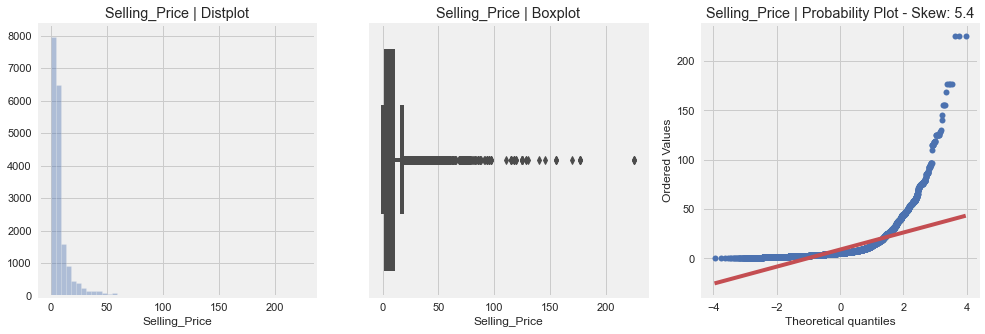

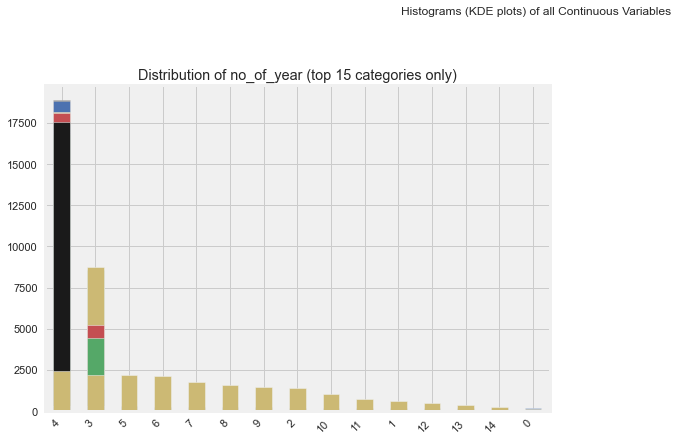

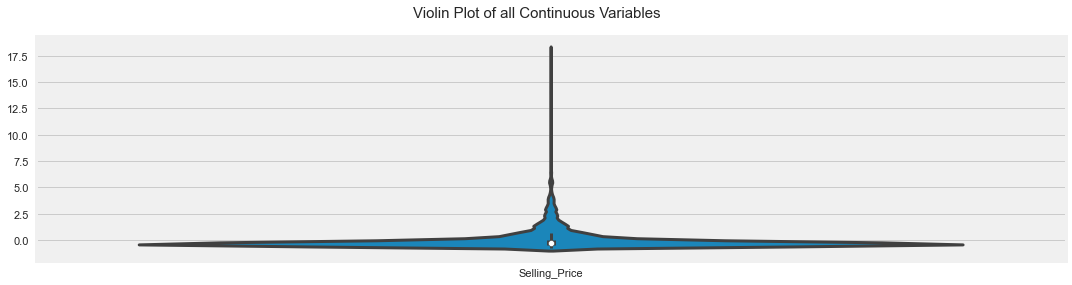

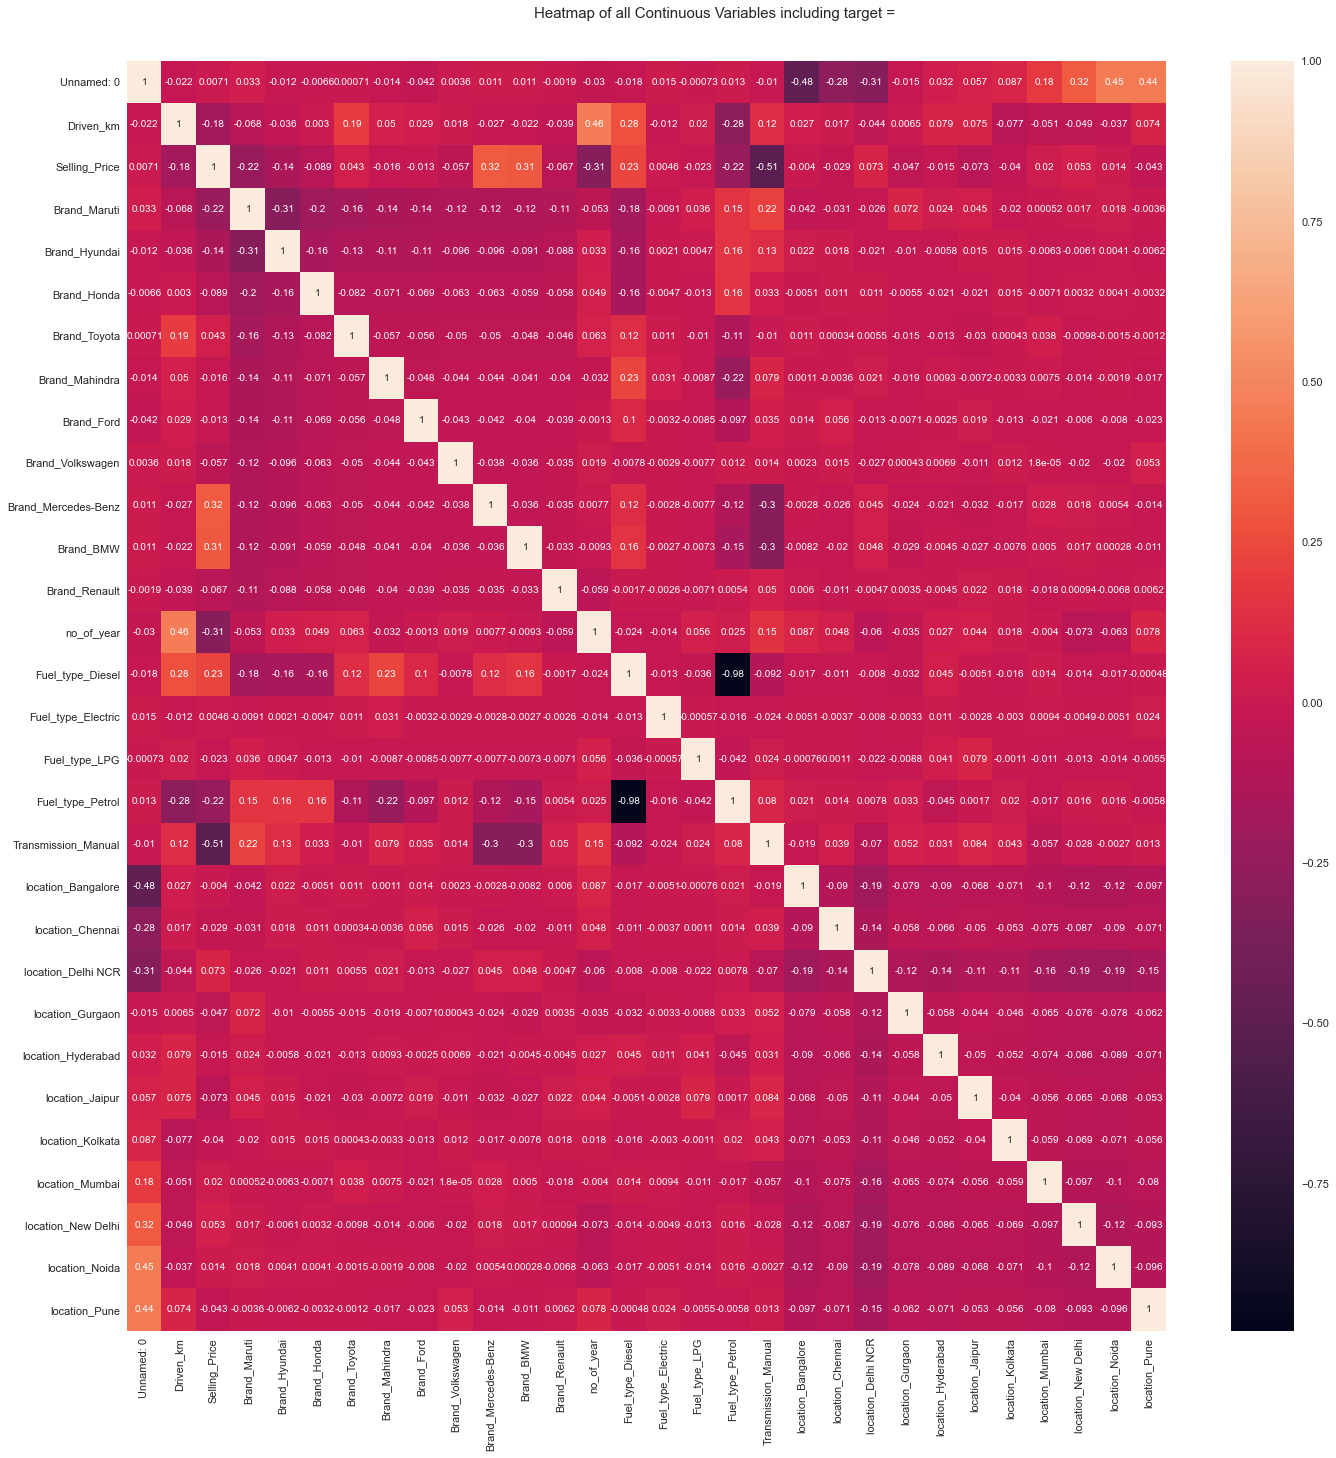

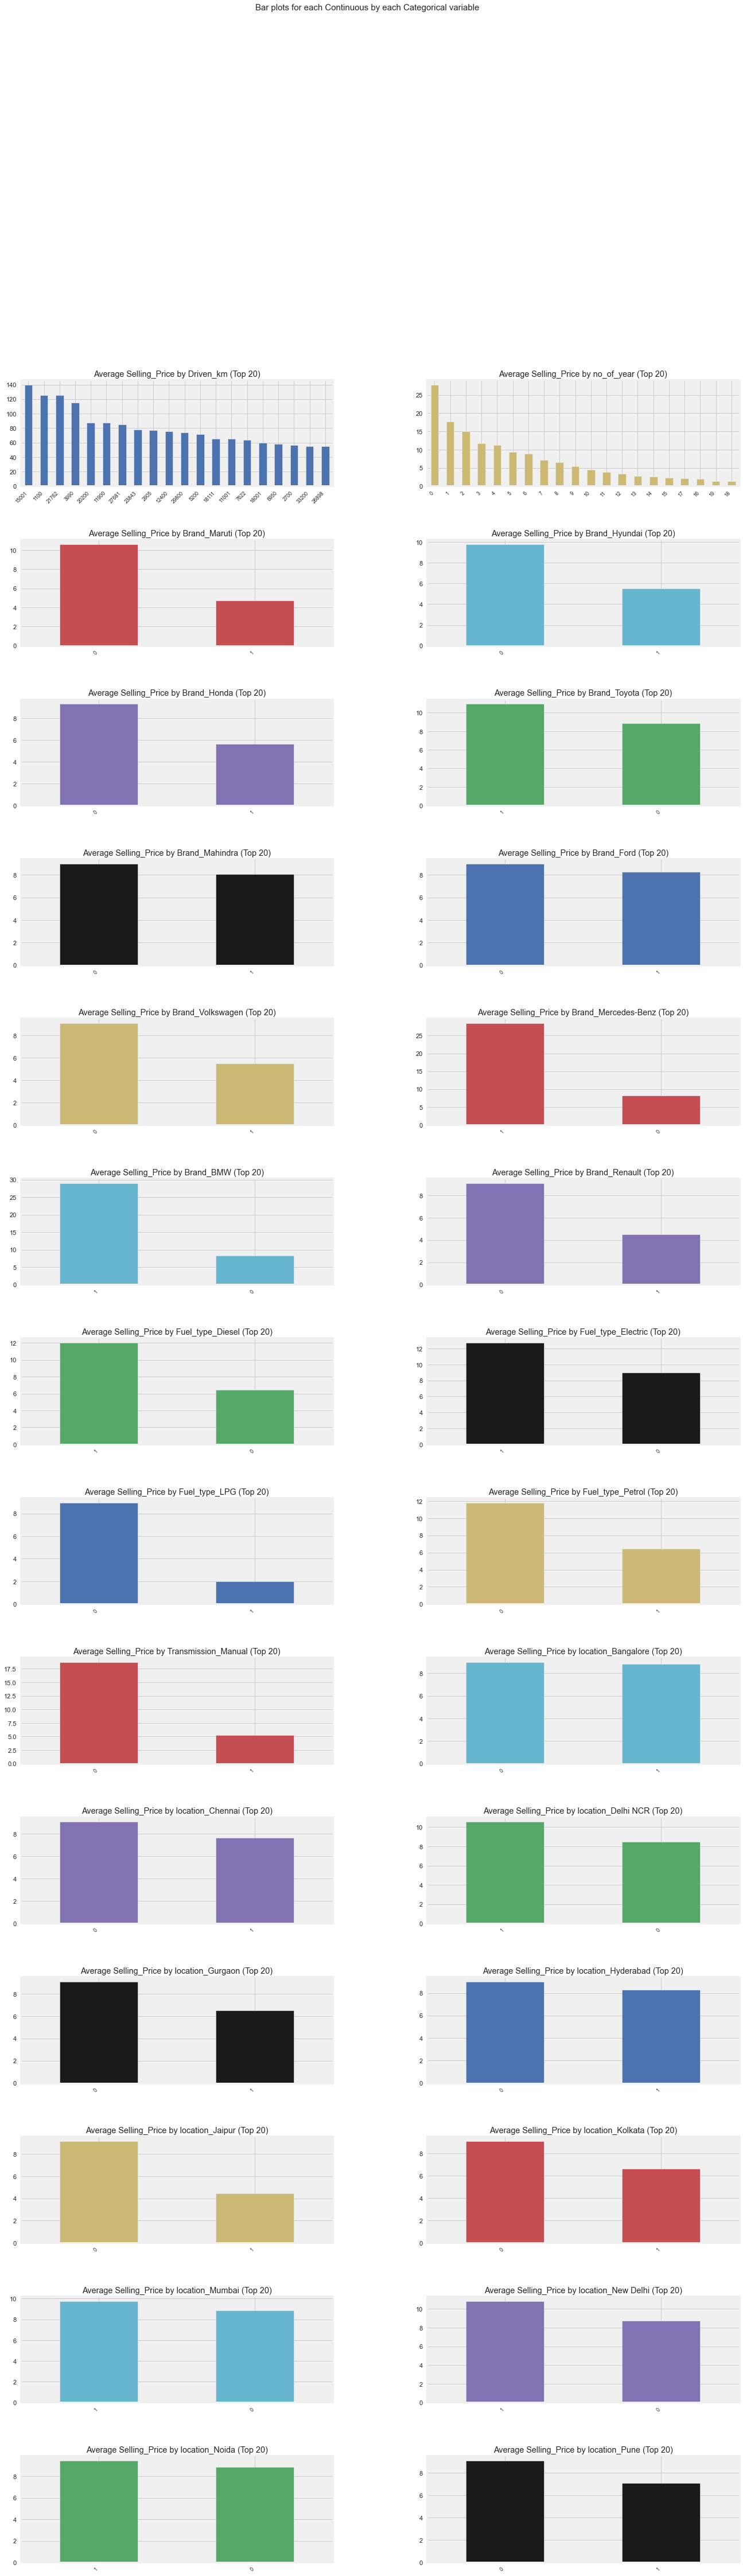

Time to run AutoViz (in seconds) = 111

 ###################### VISUALIZATION Completed ########################


In [33]:
df = AV.AutoViz("car_price_prediction_after_one_hot_encoding.xlsx")

In [34]:
df.head()

Unnamed: 0  Driven_km  Selling_Price  Brand_Maruti  Brand_Hyundai  Brand_Honda  Brand_Toyota  Brand_Mahindra  Brand_Ford  Brand_Volkswagen  Brand_Mercedes-Benz  Brand_BMW  Brand_Renault  no_of_year  Fuel_type_Diesel  Fuel_type_Electric  Fuel_type_LPG  Fuel_type_Petrol  Transmission_Manual  location_Bangalore  location_Chennai  location_Delhi NCR  location_Gurgaon  location_Hyderabad  location_Jaipur  location_Kolkata  location_Mumbai  location_New Delhi  location_Noida  location_Pune
0           0      45347           3.81             1              0            0             0               0           0                 0                    0          0              0           5                 0                   0              0                 1                    1                   0                 0                   0                 0                   0                0                 0                0                   0               0              0
1           1      19627           4.70             1              0            0             0               0           0                 0                    0          0              0           1                 0                   0              0                 1                    1                   0                 0                   0                 0                   0                0                 0                0                   0               0              0
2           2      57341           2.79             1              0            0             0               0           0                 0                    0          0              0           9                 0                   0              0                 1                    1                   0                 0                   0                 0                   0                0                 0                0                   0               0              0
3           3      17116           4.72             1              0            0             0               0           0                 0                    0          0              0           1                 0                   0              0                 1                    1                   0                 0                   0                 0                   0                0                 0                0                   0               0              0
4           4      14161           4.57             1              0            0             0               0           0                 0                    0          0              0           2                 0                   0              0                 1                    1                   0                 0                   0                 0                   0                0                 0                0                   0               0              0

## Describing Datasets:

In [35]:
# Stastistical summary
df_describe=df.describe()
df_describe

Unnamed: 0      Driven_km  Selling_Price  Brand_Maruti  Brand_Hyundai   Brand_Honda  Brand_Toyota  Brand_Mahindra    Brand_Ford  Brand_Volkswagen  Brand_Mercedes-Benz     Brand_BMW  Brand_Renault    no_of_year  Fuel_type_Diesel  Fuel_type_Electric  Fuel_type_LPG  Fuel_type_Petrol  Transmission_Manual  location_Bangalore  location_Chennai  location_Delhi NCR  location_Gurgaon  location_Hyderabad  location_Jaipur  location_Kolkata  location_Mumbai  location_New Delhi  location_Noida  location_Pune
count  18865.00000   18865.000000   18865.000000  18865.000000   18865.000000  18865.000000  18865.000000    18865.000000  18865.000000      18865.000000         18865.000000  18865.000000   18865.000000  18865.000000      18865.000000        18865.000000   18865.000000      18865.000000         18865.000000        18865.000000      18865.000000        18865.000000      18865.000000        18865.000000     18865.000000      18865.000000     18865.000000        18865.000000    18865.000000   18865.000000
mean    9432.00000   56623.499443       8.956964      0.280891       0.193692      0.092817      0.061914        0.047283      0.045004          0.037000             0.036841      0.033236       0.031381      6.198198          0.453909            0.000212       0.001537          0.535701             0.722608            0.109462          0.062179            0.234031          0.048237            0.061702         0.036311          0.039915         0.077339            0.101458        0.107978       0.070554
std     5446.00075   38608.147957      11.926699      0.449446       0.395201      0.290184      0.241005        0.212250      0.207318          0.188766             0.188376      0.179257       0.174349      3.319149          0.497884            0.014560       0.039179          0.498737             0.447723            0.312226          0.241486            0.423403          0.214273            0.240619         0.187067          0.195765         0.267136            0.301942        0.310361       0.256085
min        0.00000     472.000000       0.300000      0.000000       0.000000      0.000000      0.000000        0.000000      0.000000          0.000000             0.000000      0.000000       0.000000      0.000000          0.000000            0.000000       0.000000          0.000000             0.000000            0.000000          0.000000            0.000000          0.000000            0.000000         0.000000          0.000000         0.000000            0.000000        0.000000       0.000000
25%     4716.00000   32817.000000       3.500000      0.000000       0.000000      0.000000      0.000000        0.000000      0.000000          0.000000             0.000000      0.000000       0.000000      4.000000          0.000000            0.000000       0.000000          0.000000             0.000000            0.000000          0.000000            0.000000          0.000000            0.000000         0.000000          0.000000         0.000000            0.000000        0.000000       0.000000
50%     9432.00000   54000.000000       5.470000      0.000000       0.000000      0.000000      0.000000        0.000000      0.000000          0.000000             0.000000      0.000000       0.000000      6.000000          0.000000            0.000000       0.000000          1.000000             1.000000            0.000000          0.000000            0.000000          0.000000            0.000000         0.000000          0.000000         0.000000            0.000000        0.000000       0.000000
75%    14148.00000   73000.000000       8.900000      1.000000       0.000000      0.000000      0.000000        0.000000      0.000000          0.000000             0.000000      0.000000       0.000000      8.000000          1.000000            0.000000       0.000000          1.000000             1.000000            0.000000          0.000000            0.000000          0.000000            0.000000         0.000000          0.000000     

## Outcome of descibe of datasets:

from the above plotting we are determining mean, standard deviation, minimum and mazinum value of each column. it helps us further in data cleaning.

### Total Number of rows in the datasets:
    1.18865 rows
    2.29 columns

## Checking Correlation 

In [36]:
corr_mat=df.corr()
corr_mat

Unnamed: 0  Driven_km  Selling_Price  Brand_Maruti  Brand_Hyundai  Brand_Honda  Brand_Toyota  Brand_Mahindra  Brand_Ford  Brand_Volkswagen  Brand_Mercedes-Benz  Brand_BMW  Brand_Renault  no_of_year  Fuel_type_Diesel  Fuel_type_Electric  Fuel_type_LPG  Fuel_type_Petrol  Transmission_Manual  location_Bangalore  location_Chennai  location_Delhi NCR  location_Gurgaon  location_Hyderabad  location_Jaipur  location_Kolkata  location_Mumbai  location_New Delhi  location_Noida  location_Pune
Unnamed: 0             1.000000  -0.021639       0.007140      0.033384      -0.012017    -0.006624      0.000706       -0.013916   -0.042208          0.003580             0.011275   0.011144      -0.001904   -0.030382         -0.018232            0.014904      -0.000728          0.013192            -0.010049           -0.479039         -0.275275           -0.307341         -0.015109            0.031620         0.056887          0.086676         0.181872            0.315149        0.452512       0.443541
Driven_km             -0.021639   1.000000      -0.179689     -0.068184      -0.036379     0.002971      0.193974        0.049966    0.028520          0.017549            -0.027266  -0.022306      -0.039034    0.463704          0.275993           -0.011625       0.020316         -0.278593             0.121495            0.027292          0.017004           -0.044030          0.006467            0.079318         0.074503         -0.076850        -0.051215           -0.049493       -0.037447       0.073848
Selling_Price          0.007140  -0.179689       1.000000     -0.221589      -0.140579    -0.088945      0.042553       -0.016334   -0.012836         -0.056896             0.318818   0.311755      -0.067144   -0.308634          0.233153            0.004589      -0.022985         -0.223833            -0.505879           -0.003963         -0.028935            0.073410         -0.046609           -0.014602        -0.073377         -0.039996         0.019571            0.053115        0.014484      -0.042884
Brand_Maruti           0.033384  -0.068184      -0.221589      1.000000      -0.306321    -0.199912     -0.160562       -0.139233   -0.135674         -0.122506            -0.122232  -0.115882      -0.112493   -0.053099         -0.180579           -0.009102       0.035687          0.154978             0.217837           -0.041946         -0.030519           -0.026222          0.072324            0.023550         0.044508         -0.019587         0.000521            0.017334        0.018175      -0.003623
Brand_Hyundai         -0.012017  -0.036379      -0.140579     -0.306321       1.000000    -0.156774     -0.125915       -0.109189   -0.106397         -0.096071            -0.095856  -0.090876      -0.088219    0.033332         -0.157495            0.002075       0.004735          0.160713             0.126008            0.021922          0.017663           -0.020640         -0.010179           -0.005830         0.014571          0.015177        -0.006325           -0.006098        0.004084      -0.006183
Brand_Honda           -0.006624   0.002971      -0.088945     -0.199912      -0.156774     1.000000     -0.082175       -0.071259   -0.069437         -0.062698            -0.062558  -0.059308      -0.057574    0.048541         -0.157331           -0.004658      -0.012551          0.162627             0.032933           -0.005072          0.010686            0.010878         -0.005511           -0.020529        -0.021074          0.015032        -0.007126            0.003235        0.004080      -0.003239
Brand_Toyota           0.000706   0.193974       0.042553     -0.160562      -0.125915    -0.082175      1.000000       -0.057233   -0.055769         -0.050357            -0.050244  -0.047634      -0.046241    0.063387          0.118767            0.011366      -0.010080         -0.113653            -0.010320            0.010672          0.000342            0.005533         -0.014722           -0.012860        -0.029879          0.000426         0

<AxesSubplot:title={'center':'Corrleation Matrix'}>

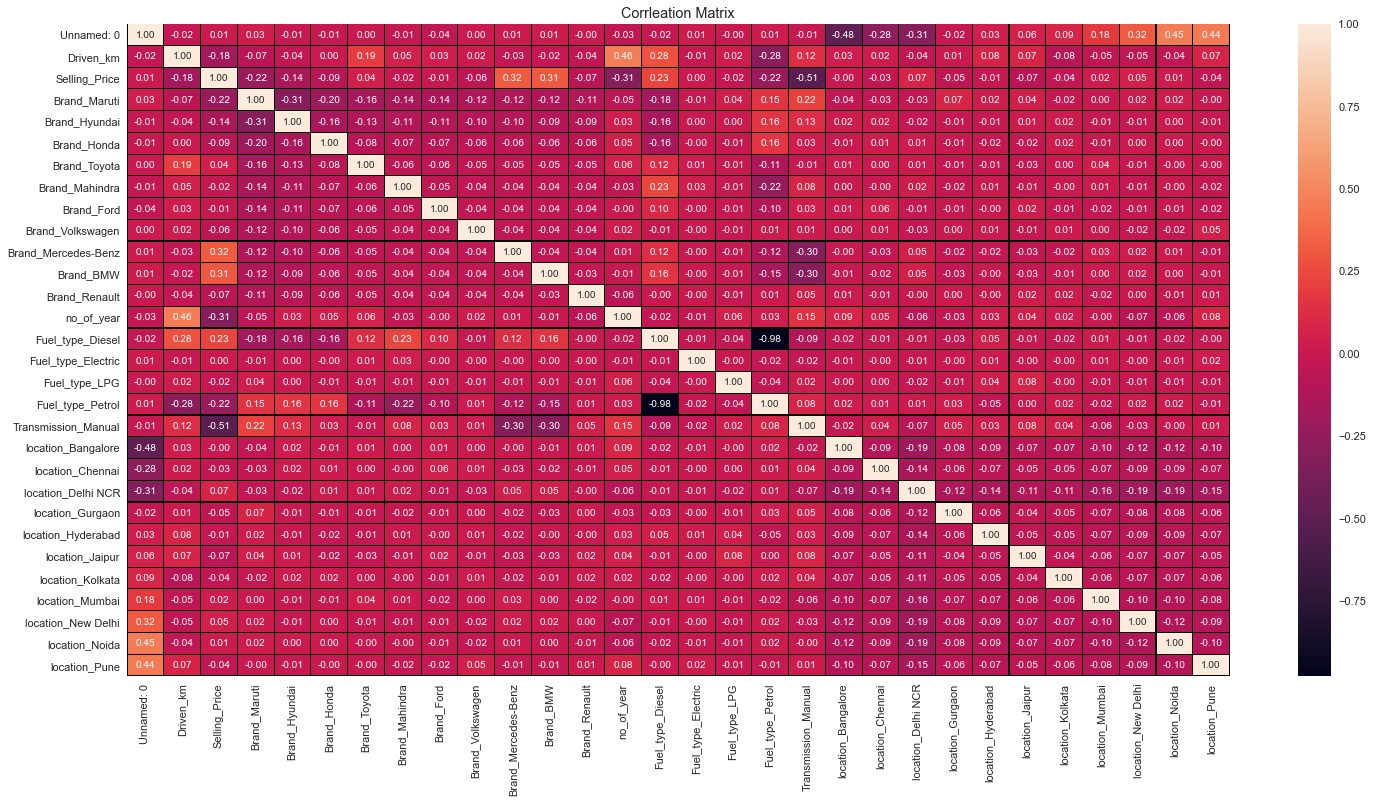

In [37]:
# Heatmap Display distribution of data across all level of category

plt.figure(figsize=(22,12))
plt.title("Corrleation Matrix")
sns.heatmap(corr_mat,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

#### Observations: We are unable to identify the correlation in above heatmap due to huge number of columns.

In [38]:
corr_matrix=df.corr()
corr_matrix["Selling_Price"].sort_values(ascending=False)

Selling_Price          1.000000
Brand_Mercedes-Benz    0.318818
Brand_BMW              0.311755
Fuel_type_Diesel       0.233153
location_Delhi NCR     0.073410
location_New Delhi     0.053115
Brand_Toyota           0.042553
location_Mumbai        0.019571
location_Noida         0.014484
Unnamed: 0             0.007140
Fuel_type_Electric     0.004589
location_Bangalore    -0.003963
Brand_Ford            -0.012836
location_Hyderabad    -0.014602
Brand_Mahindra        -0.016334
Fuel_type_LPG         -0.022985
location_Chennai      -0.028935
location_Kolkata      -0.039996
location_Pune         -0.042884
location_Gurgaon      -0.046609
Brand_Volkswagen      -0.056896
Brand_Renault         -0.067144
location_Jaipur       -0.073377
Brand_Honda           -0.088945
Brand_Hyundai         -0.140579
Driven_km             -0.179689
Brand_Maruti          -0.221589
Fuel_type_Petrol      -0.223833
no_of_year            -0.308634
Transmission_Manual   -0.505879
Name: Selling_Price, dtype: float64

### Now we can clearly identify the correlation of independent variables with the target variables "Selling_Price".There are some variables who has less than 0.01 correlation value(very week relationship.)

### Checking the columns which are postively and negative correlated with the target columns:

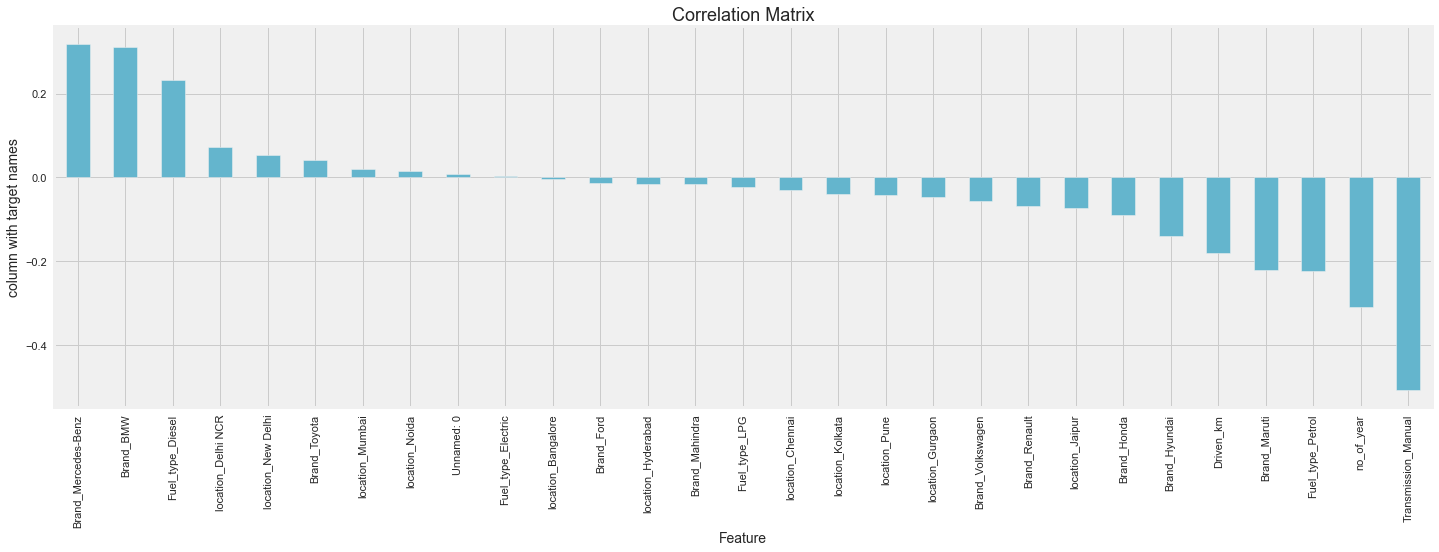

In [39]:
plt.figure(figsize=(22,7))
df.corr()['Selling_Price'].sort_values(ascending=False).drop(['Selling_Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)

plt.title('Correlation Matrix',fontsize=18)
plt.show()

### Outcome of Correlation:
    The Columns of the dataset is Correlated in both Positively and Negatively with target columns.
    The Positive and negative correlation values is shown in both numbers and graph.
    Max correlation:Brand_Mercedes-Benz
    Min correlation:Transmission_Manual

### Lets check the data distribution among all the columns.

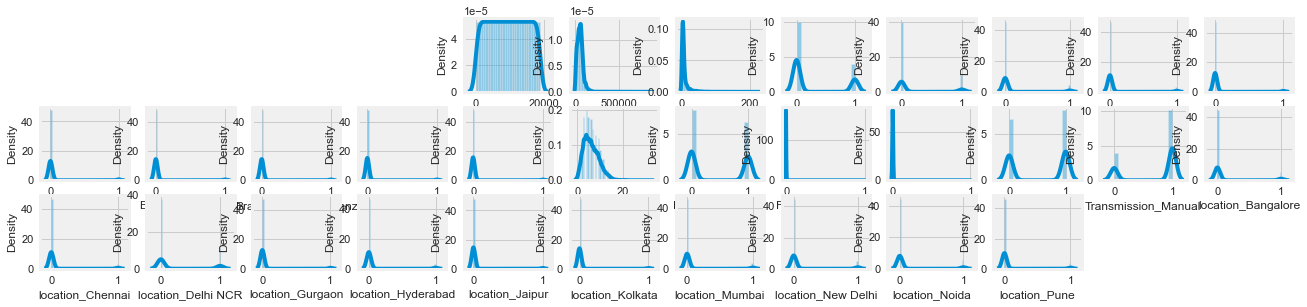

In [40]:
collist=df.columns.values
ncol=12
nrow=10
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(20,16))
for i in range(0, len(collist)):
    plt.subplot(nrow,ncol,i+5)
    sns.distplot(df[collist[i]])

Now, we can see skewness in data for the multiple columns, will handle the skewness in further steps.

### Outliers Checking:

In this dataset, We applied one hot encoding method to categorical features. so we check outlies for nominal features i.e. Diven_Km, no_of_years and Selling Price. Only Driven_km and no_of_years is considered because Selling Price is our target Variable.

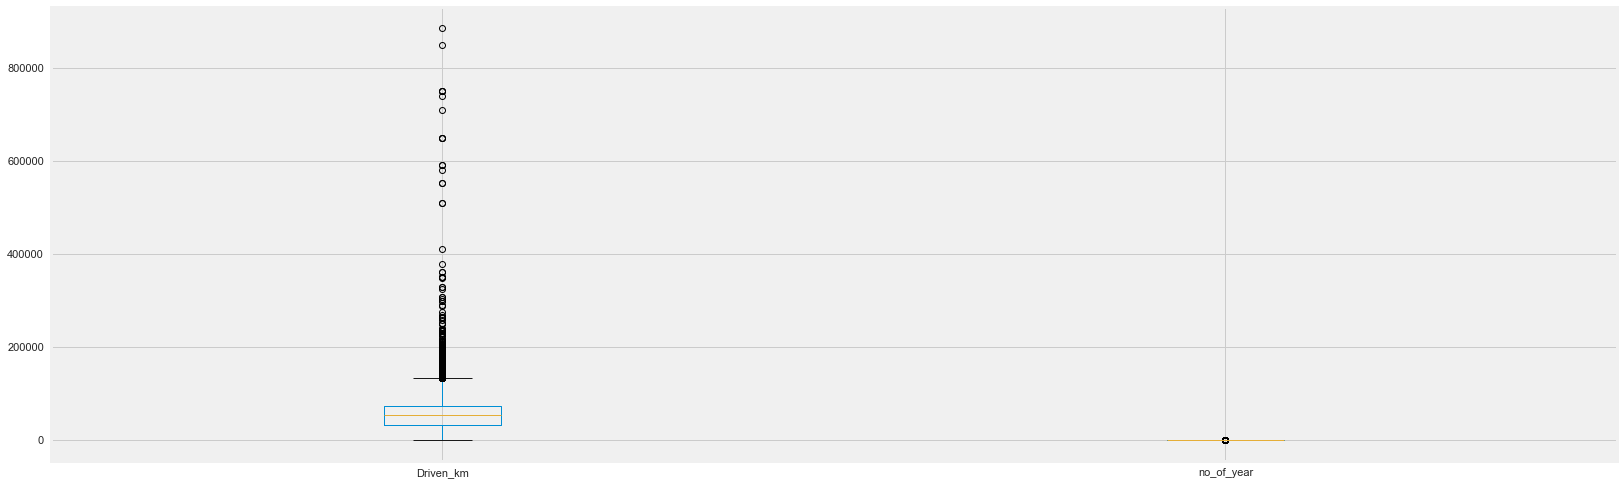

In [41]:
#Plotting Boxplots for  columns
df[["Driven_km","no_of_year"]].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

#### We can see outliers in Driven km due to various kilometers driven for different cars. so we proceed further steps:

### Skewness:

In [42]:
#Checking skewness
df.skew()

Unnamed: 0              0.000000
Driven_km               4.840692
Selling_Price           5.401628
Brand_Maruti            0.975123
Brand_Hyundai           1.550303
Brand_Honda             2.806672
Brand_Toyota            3.635883
Brand_Mahindra          4.266337
Brand_Ford              4.389812
Brand_Volkswagen        4.906065
Brand_Mercedes-Benz     4.917924
Brand_BMW               5.208302
Brand_Renault           5.376202
no_of_year              0.742327
Fuel_type_Diesel        0.185166
Fuel_type_Electric     68.658574
Fuel_type_LPG          25.448414
Fuel_type_Petrol       -0.143181
Transmission_Manual    -0.994505
location_Bangalore      2.501900
location_Chennai        3.626443
location_Delhi NCR      1.256471
location_Gurgaon        4.217141
location_Hyderabad      3.643476
location_Jaipur         4.957997
location_Kolkata        4.700873
location_Mumbai         3.164728
location_New Delhi      2.640141
location_Noida          2.526506
location_Pune           3.354289
dtype: flo

### Standard Scaler Technique:

In [43]:
from sklearn.preprocessing import StandardScaler

# 2 features are taken in consideration
features = df[["Driven_km","Selling_Price"]]

# the scaler object (model)
scaler = StandardScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(features) 
scaled_data

array([[-0.29208338, -0.43156118],
       [-0.95828166, -0.3569367 ],
       [ 0.01858467, -0.51708585],
       ...,
       [-1.05222805, -0.2873431 ],
       [ 1.84879089, -0.20601081],
       [ 7.59902487, -0.43659204]])

In [44]:
df.head()

Unnamed: 0  Driven_km  Selling_Price  Brand_Maruti  Brand_Hyundai  Brand_Honda  Brand_Toyota  Brand_Mahindra  Brand_Ford  Brand_Volkswagen  Brand_Mercedes-Benz  Brand_BMW  Brand_Renault  no_of_year  Fuel_type_Diesel  Fuel_type_Electric  Fuel_type_LPG  Fuel_type_Petrol  Transmission_Manual  location_Bangalore  location_Chennai  location_Delhi NCR  location_Gurgaon  location_Hyderabad  location_Jaipur  location_Kolkata  location_Mumbai  location_New Delhi  location_Noida  location_Pune
0           0      45347           3.81             1              0            0             0               0           0                 0                    0          0              0           5                 0                   0              0                 1                    1                   0                 0                   0                 0                   0                0                 0                0                   0               0              0
1           1      19627           4.70             1              0            0             0               0           0                 0                    0          0              0           1                 0                   0              0                 1                    1                   0                 0                   0                 0                   0                0                 0                0                   0               0              0
2           2      57341           2.79             1              0            0             0               0           0                 0                    0          0              0           9                 0                   0              0                 1                    1                   0                 0                   0                 0                   0                0                 0                0                   0               0              0
3           3      17116           4.72             1              0            0             0               0           0                 0                    0          0              0           1                 0                   0              0                 1                    1                   0                 0                   0                 0                   0                0                 0                0                   0               0              0
4           4      14161           4.57             1              0            0             0               0           0                 0                    0          0              0           2                 0                   0              0                 1                    1                   0                 0                   0                 0                   0                0                 0                0                   0               0              0

In [45]:
# Splitting the indepedent and target variable in x and y
x= df.drop('Selling_Price',axis=1)
y= df['Selling_Price']

### To handle Skewness we proceed with power transform function

In [46]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [47]:
df_new.skew()

Unnamed: 0             -0.291307
Driven_km               0.122132
Brand_Maruti            0.975123
Brand_Hyundai           1.550303
Brand_Honda             2.806672
Brand_Toyota            3.635883
Brand_Mahindra          4.266337
Brand_Ford              4.389812
Brand_Volkswagen        4.906065
Brand_Mercedes-Benz     4.917924
Brand_BMW               5.208302
Brand_Renault           5.376202
no_of_year             -0.017734
Fuel_type_Diesel        0.185166
Fuel_type_Electric     68.658574
Fuel_type_LPG          25.448414
Fuel_type_Petrol       -0.143181
Transmission_Manual    -0.994505
location_Bangalore      2.501900
location_Chennai        3.626443
location_Delhi NCR      1.256471
location_Gurgaon        4.217141
location_Hyderabad      3.643476
location_Jaipur         4.957997
location_Kolkata        4.700873
location_Mumbai         3.164728
location_New Delhi      2.640141
location_Noida          2.526506
location_Pune           3.354289
dtype: float64

### Skewness has been removed for nominal variable i.e.Driven_km amd no_of_years.,remaining all categorical variable.Now we can proceed with further steps.

In [48]:
x=df_new
x.head()

Unnamed: 0  Driven_km  Brand_Maruti  Brand_Hyundai  Brand_Honda  Brand_Toyota  Brand_Mahindra  Brand_Ford  Brand_Volkswagen  Brand_Mercedes-Benz  Brand_BMW  Brand_Renault  no_of_year  Fuel_type_Diesel  Fuel_type_Electric  Fuel_type_LPG  Fuel_type_Petrol  Transmission_Manual  location_Bangalore  location_Chennai  location_Delhi NCR  location_Gurgaon  location_Hyderabad  location_Jaipur  location_Kolkata  location_Mumbai  location_New Delhi  location_Noida  location_Pune
0   -2.193491  -0.146292      1.600033      -0.490123    -0.319865     -0.256904       -0.222778   -0.217082         -0.196014            -0.195576  -0.185415      -0.179993   -0.234316         -0.911701           -0.014563      -0.039238          0.930974             0.619577           -0.350595          -0.25749           -0.552753         -0.225127           -0.256435         -0.19411         -0.203899         -0.28952           -0.336026        -0.34792      -0.275517
1   -2.191247  -1.172117      1.600033      -0.490123    -0.319865     -0.256904       -0.222778   -0.217082         -0.196014            -0.195576  -0.185415      -0.179993   -2.014985         -0.911701           -0.014563      -0.039238          0.930974             0.619577           -0.350595          -0.25749           -0.552753         -0.225127           -0.256435         -0.19411         -0.203899         -0.28952           -0.336026        -0.34792      -0.275517
2   -2.189324   0.209580      1.600033      -0.490123    -0.319865     -0.256904       -0.222778   -0.217082         -0.196014            -0.195576  -0.185415      -0.179993    0.894167         -0.911701           -0.014563      -0.039238          0.930974             0.619577           -0.350595          -0.25749           -0.552753         -0.225127           -0.256435         -0.19411         -0.203899         -0.28952           -0.336026        -0.34792      -0.275517
3   -2.187583  -1.309031      1.600033      -0.490123    -0.319865     -0.256904       -0.222778   -0.217082         -0.196014            -0.195576  -0.185415      -0.179993   -2.014985         -0.911701           -0.014563      -0.039238          0.930974             0.619577           -0.350595          -0.25749           -0.552753         -0.225127           -0.256435         -0.19411         -0.203899         -0.28952           -0.336026        -0.34792      -0.275517
4   -2.185966  -1.486435      1.600033      -0.490123    -0.319865     -0.256904       -0.222778   -0.217082         -0.196014            -0.195576  -0.185415      -0.179993   -1.445159         -0.911701           -0.014563      -0.039238          0.930974             0.619577           -0.350595          -0.25749           -0.552753         -0.225127           -0.256435         -0.19411         -0.203899         -0.28952           -0.336026        -0.34792      -0.275517

## Importing  Libraries for Metrics and Model buiding.

In [49]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

## Regression Method

In [50]:
maxR2=0
BestRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    r2=r2_score(y_test, predrf)
    if r2>maxR2:
        maxR2=r2
        BestRS=i
print("Best R2 is " ,maxR2," on Random_state ",BestRS)

Best R2 is  0.5368833776721446  on Random_state  90


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.20,random_state = BestRS)

In [52]:
def eval(x):
    mod =x
    mod.fit(x_train, y_train)
    predict_test = mod.predict(x_test)
    print("R2 score is ", r2_score(y_test, predict_test)*100)
    print("Mean Absolute error is", mean_absolute_error(y_test,predict_test))
    print("Mean squared error is", mean_squared_error(y_test,predict_test))
    print("Root mean squared error is", np.sqrt(mean_squared_error(y_test,predict_test)))

In [53]:
eval(LinearRegression())

R2 score is  53.688337767214456
Mean Absolute error is 4.1644446724756605
Mean squared error is 57.70395662847746
Root mean squared error is 7.596312041278811


In [54]:
eval(KNeighborsRegressor())

R2 score is  62.6001548574777
Mean Absolute error is 2.731398886827458
Mean squared error is 46.59990460217333
Root mean squared error is 6.826412278948095


In [55]:
eval(RandomForestRegressor())

R2 score is  77.5855185803132
Mean Absolute error is 2.0134636363636367
Mean squared error is 27.92826258729658
Root mean squared error is 5.284719726465783


In [56]:
eval(DecisionTreeRegressor())

R2 score is  47.92634560529259
Mean Absolute error is 2.1534614365226608
Mean squared error is 64.88335226610123
Root mean squared error is 8.055020314443734


In [57]:
eval(XGBRegressor())

R2 score is  69.97134499959134
Mean Absolute error is 2.5217736005839555
Mean squared error is 37.415461294507544
Root mean squared error is 6.116817905946485


So, In our modelling approach, the best model is Random forest Regreesor and the worst model is Linear Regression. We can see that the difference in R2 score between the best model and the worst model is significant; the best model has almost 25 % of the R2 score of the worst model.but it can be due to overhitting also so we well check cross validation scores.

## Cross Validation:

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
scr=cross_val_score(LinearRegression(), x, y, cv=5)
print("cross validation score of Linear Regression model:",scr.mean()*100)

cross validation score of Linear Regression model: -1.2343360858000853e+23


In [60]:
scr=cross_val_score(KNeighborsRegressor(), x, y, cv=5)
print("cross validation score of KNeighbors Regressor model:",scr.mean()*100)

cross validation score of KNeighbors Regressor model: 53.634920216706504


In [61]:
scr=cross_val_score(RandomForestRegressor(), x, y, cv=5)
print("cross validation score of Random Forest Regressor model:",scr.mean()*100)

cross validation score of Random Forest Regressor model: 64.33005187103122


In [62]:
scr=cross_val_score(DecisionTreeRegressor(), x, y, cv=5)
print("cross validation score of Decision Tree Regressor model:",scr.mean()*100)

cross validation score of Decision Tree Regressor model: 43.76889109733828


In [63]:
scr=cross_val_score(XGBRegressor(), x, y, cv=5)
print("cross validation score of XGBoost Regressor model:",scr.mean()*100)

cross validation score of XGBoost Regressor model: 7.379182716819574


### Min difference in R2 score and cross validation score is for XGBoost Regressor model,so this is our best model.

### Here we have handled the problem of the overfitting and the underfitting by checking the R2 score.

## Hyper Parameter Tuning

Import RandomizedSearchCV

In [64]:
from sklearn.model_selection import RandomizedSearchCV

### Hyper Parameter Tuning for Random Forest Regressor

In [65]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Verbose is a general programming term for produce lots of logging output.
verbosity = [3]
#minimum sum of instance weight (hessian) needed in a child   
min_child_weight  = [1, 2, 5, 10]
# The booster parameter sets the type of learner.
booster = ['gbtree', 'gblinear']

In [66]:
from xgboost import XGBRegressor
parameters={'n_estimators': n_estimators,
               'max_depth': max_depth,
               'verbosity': verbosity,
               'min_child_weight': min_child_weight,
               'booster': booster}
xgb=XGBRegressor()
clf=RandomizedSearchCV(xgb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

[11:41:14] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:155: Using tree method: 2
[11:41:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 554 extra nodes, 0 pruned nodes, max_depth=10
[11:41:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 674 extra nodes, 0 pruned nodes, max_depth=10
[11:41:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 750 extra nodes, 0 pruned nodes, max_depth=10
[11:41:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 952 extra nodes, 0 pruned nodes, max_depth=10
[11:41:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 992 extra nodes, 0 pruned nodes, max_depth=10
[11:41:14] I

In [67]:
xgb=XGBRegressor(n_estimators = 400, min_child_weight = 2, max_depth = 20, booster = 'gbtree',
                         verbosity = 3)
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_decision=xgb.predict(x_test)
xgbs=r2_score(y_test,pred_decision)
print('R2 Score:',xgbs*100)

[11:57:24] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:155: Using tree method: 2
[11:57:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 1232 extra nodes, 0 pruned nodes, max_depth=20
[11:57:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 2014 extra nodes, 0 pruned nodes, max_depth=20
[11:57:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 3224 extra nodes, 0 pruned nodes, max_depth=20
[11:57:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 4294 extra nodes, 0 pruned nodes, max_depth=20
[11:57:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 5232 extra nodes, 0 pruned nodes, max_depth=20
[11:57:

In [68]:
xgbscore=cross_val_score(xgb,x,y,cv=5)
xgbc=xgbscore.mean()
print('Cross Val Score:',xgbc*100)

[11:58:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 1126 extra nodes, 0 pruned nodes, max_depth=20
[11:58:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 1892 extra nodes, 0 pruned nodes, max_depth=20
[11:58:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 3024 extra nodes, 0 pruned nodes, max_depth=20
[11:58:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 3894 extra nodes, 0 pruned nodes, max_depth=20
[11:58:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 4984 extra nodes, 0 pruned nodes, max_depth=20
[11:58:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 577

### We are getting model accuracy and cross validation has 78% & 70% respectively.which shows our model is performing well.

## Analysis and Comparision

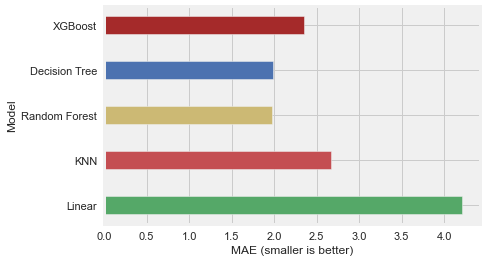

In [69]:
x = ['Linear','KNN','Random Forest', 'Decision Tree', 'XGBoost']
y = [4.21, 2.67 , 1.97, 1.99, 2.35]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="MAE (smaller is better)", ylabel="Model");

By looking at the table and the graph, we can see that Random Forest has the smallest MAE, 1.97 followed by 1.99 with a little larger error of 0.02. After that, XGBoost come with error of 2.35.At last, the K-Nearest Neighbors and linear comes with an similar errors: 2.67 and 4.21 respectively.

So, In our experiment, the best model is Random Forest and the worst model is Linear. We can see that the difference in MAE between the best model and the worst model is significant; the best model has least error of the worst model.

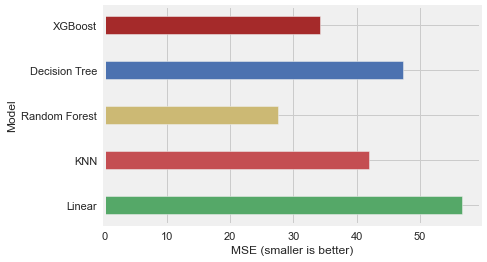

In [70]:
x = ['Linear','KNN','Random Forest', 'Decision Tree', 'XGBoost']
y = [56.71, 41.92, 27.57, 47.38, 34.22]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="MSE (smaller is better)", ylabel="Model");

By looking at the table and the graph, we can see that Random Forest has the smallest MSE, 27.57. After that, XGBoost and  K-Nearest Neighbors comes with similar errors: 34.22 and 41.92 respectively. At last, the Decision Tree and Linear comes with an similar errors: 47.38 and 56.71 respectively.

So, in our experiment, the best model is Random Forest and the worst model is Linear. We can see that the difference in MSE between the best model and the worst model is significant; the best model has least error of the worst model.

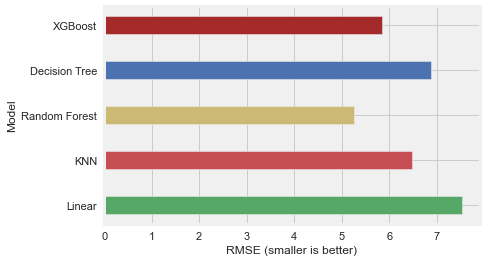

In [71]:
x = ['Linear','KNN','Random Forest', 'Decision Tree', 'XGBoost']
y = [7.53, 6.47, 5.25, 6.88, 5.85]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="RMSE (smaller is better)", ylabel="Model");

By looking at the table and the graph, we can see that Random Forest has the smallest RMSE of 5.25. After that, XGBoost and K-Nearest Neighbors comes with similar errors: 5.85 and 6.47 respectively. At last, the Decision Tree and linear comes with an similar errors: 6.88 and 7.53 respectively.

So, in our experiment, the best model is Random forest and the worst model is Linear. We can see that the difference in RMSE between the best model and the worst model is significant; the best model has almost least error of the worst model.

We know that our best model is Random Forest but when compared with cross validation score it has overfitting and crossfitting is high. After compared with R2 score, minimum difference is for XGBoost. so finally , i choosen this is our best model for choice then the worst model is Linear.

## Feature Importances

Now, let's see the most important features as for XGBoost Regressor:

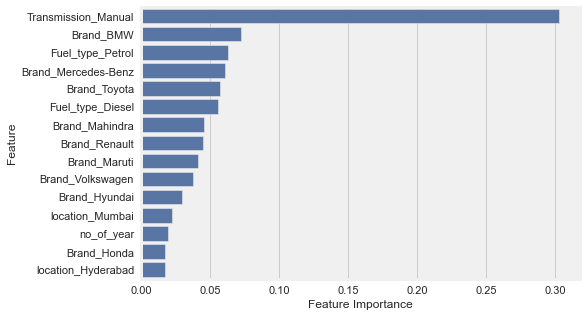

In [72]:
xgb_feature_importances = xgb.feature_importances_
xgb_feature_importances = pd.Series(xgb_feature_importances, 
                                    index=x_train.columns.values).sort_values(ascending=False).head(15)

fig, js = plt.subplots(figsize=(7,5))
sns.barplot(x=xgb_feature_importances, y=xgb_feature_importances.index, color="b");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

## Model Saving

In [73]:
import pickle
filename='Car_Price_Prediction_Project.pkl'
pickle.dump(xgb, open(filename, 'wb'))

## Conclusion

In [74]:
loaded_model = pickle.load(open('Car_Price_Prediction_Project.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

75.68969648577892


In [75]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

0         1         2        3         4         5         6          7         8         9          10        11        12        13        14         15        16        17        18        19         20        21         22        23         24        25        26        27        28        29        30        31        32        33       34        35        36        37        38        39       40        41        42        43       44        45       46         47        48        49         50      51        52         53        54        55        56        57         58        59        60        61        62        63        64         65        66        67        68        69        70       71        72        73        74        75        76        77        78        79        80        81        82        83        84        85        86        87         88       89        90        91        92        93        94        95        96          97    \
Predicted  8.281697  3.735925  2.630901  8.37298  7.608566  1.998633  8.098755  11.253823  6.751034  3.714542  17.561443  6.702138  2.719904  4.124118  4.096763  88.470062  7.168324  4.571557  5.355092  4.104799  14.900163  6.858614  26.769234  1.238962  32.940094  7.441225  3.689829  8.077418  6.146087  0.877337  5.218715  7.099299  5.567219  6.175018  3.62204  3.514479  4.365251  7.100829  3.909027  8.828438  8.10796  7.043416  1.458903  3.487299  5.24464  4.735585  6.17141  50.304394  8.247314  6.444895  15.011166  2.9261  4.394914  58.143745  7.244241  2.995753  7.000198  5.285025  76.817009  8.293334  6.535521  3.459074  2.738599  1.490402  7.970296  13.467395  4.078019  5.209208  6.066464  5.711284  3.784027  4.40208  3.231225  7.341312  3.443522  7.877986  7.690072  2.213619  6.486061  2.238374  2.831024  4.948421  4.029556  3.558396  7.193623  5.404835  5.174687  2.048778  11.851962  3.86481  4.692991  9.781281  4.884149  5.486593  6.777014  5.995112  8.344201  106.125786   
Original   8.281697  3.735925  2.630901  8.37298  7.608566  1.998633  8.098755  11.253823  6.751034  3.714542  17.561443  6.702138  2.719904  4.124118  4.096763  88.470062  7.168324  4.571557  5.355092  4.104799  14.900163  6.858614  26.769234  1.238962  32.940094  7.441225  3.689829  8.077418  6.146087  0.877337  5.218715  7.099299  5.567219  6.175018  3.62204  3.514479  4.365251  7.100829  3.909027  8.828438  8.10796  7.043416  1.458903  3.487299  5.24464  4.735585  6.17141  50.304394  8.247314  6.444895  15.011166  2.9261  4.394914  58.143745  7.244241  2.995753  7.000198  5.285025  76.817009  8.293334  6.535521  3.459074  2.738599  1.490402  7.970296  13.467395  4.078019  5.209208  6.066464  5.711284  3.784027  4.40208  3.231225  7.341312  3.443522  7.877986  7.690072  2.213619  6.486061  2.238374  2.831024  4.948421  4.029556  3.558396  7.193623  5.404835  5.174687  2.048778  11.851962  3.86481  4.692991  9.781281  4.884149  5.486593  6.777014  5.995112  8.344201  106.125786   

                98        99       100        101        102       103        104       105       106      107       108       109       110       111       112        113        114      115        116        117       118        119       120       121        122       123       124       125       126      127      128      129       130       131        132       133       134        135       136        137       138       139        140       141        142       143       144       145       146      147       148       149       150        151       152        153       154       155       156       157       158        159       160       161       162       163        164        165       166        167        168        169        170       171       172       173       174       175       176        177        178       179       180        181       182       183        184       185        186      187       188       189       190        191      192        193   \
Predicted  10.940084  6.5